## Now we define the basic model and load the orientation and lithological information
mj: We inset the model dimensions as once reprojects the edge pixels of the topography are undefined. Probably doesn't need to be that extreme (unit is metres). Could use parameter <b>maxtopo</b> to 

In [1]:
import pandas as pd
mname='hams2' 

contacts=pd.read_csv('../test_data2/output/'+mname+'_contacts4.csv',",")
actual_cpts=set(contacts['formation'])

#contacts2=contacts.loc[contacts['formation'].isin(actual_cpts)]  
#contacts2.to_csv('../test_data2/output/'+mname+'_contacts5.csv',index=False)
 
orientations=pd.read_csv('../test_data2/output/'+mname+'_orientations.csv',",")
orientations2=orientations.loc[orientations['formation'].isin(actual_cpts)]  
orientations2.to_csv('../test_data2/output/'+mname+'_orientations2.csv',index=False)


In [2]:
import sys, os
sys.path.append("../../../../gempy")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

mname='hams2' 
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os
geo_model = gp.create_model('gp_test')
# extents=[   np.round_(geom_rp['coordinates'][0][0][0]+step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][2][0]-step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][1][1]+step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][0][1]-step_in, decimals=-3),
#             model_base,1200]

#print(extents)
gp.init_data(geo_model, extent=[502536, 600652, 7.458e6, 7.56e6, -3000, 1200],
    resolution = (50,50,50), 
      path_o = '../test_data2/output/hams2_orientations2.csv',
      path_i = '../test_data2/output/hams2_contacts4.csv', default_values=True); #%%

Active grids: ['regular']


## Show example lithological points

In [3]:
gp.get_data(geo_model, 'surface_points')['surface'].value_counts()

P__HAb_cib       105
A_HAm_cib         61
A_HAS_xsl_ci      60
A_FOj_xs_b        54
A_HAd_kd          44
P__HAw_fr         42
P__HAo_ci         27
A_FOu_bbo         25
P__HAj_xci_od     25
A_FOh_xs_f        19
P__SKq_stq        18
A_FOo_bbo         16
A_FOp_bs          15
P__TK_s           14
P__TKa_xs_k       14
P__WYm_sp         13
P__TKo_stq         7
A_FOr_b            6
P__SKb_bb          2
P__WYa_st          2
P__TKk_sf          1
basement           0
Name: surface, dtype: int64

## Show example orientations

In [4]:
gp.get_data(geo_model, 'orientations')['surface'].value_counts()

A_FOj_xs_b       21
A_FOh_xs_f       20
P__HAb_cib       16
A_HAm_cib        13
A_FOu_bbo         9
A_FOp_bs          7
A_HAS_xsl_ci      6
P__SKq_stq        5
P__TKk_sf         3
A_HAd_kd          3
P__HAj_xci_od     3
P__TK_s           2
P__HAo_ci         1
P__WYm_sp         1
P__WYa_st         1
P__SKb_bb         0
P__HAw_fr         0
P__TKo_stq        0
P__TKa_xs_k       0
A_FOr_b           0
A_FOo_bbo         0
basement          0
Name: surface, dtype: int64

## Plot some of this data

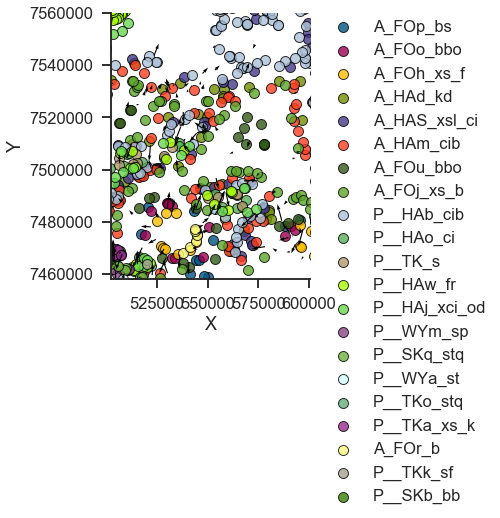

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_model, direction='z');

## Load reprojected topgraphy to model

C:\Users\00073294\Dropbox\1_Jupyter_notebooks\map2loop\notebooks
Cropped raster to geo_model.grid.extent.
[ 502536  600652 7458000 7560000] [115 110]
storing converted file...
Active grids: ['regular' 'topography']


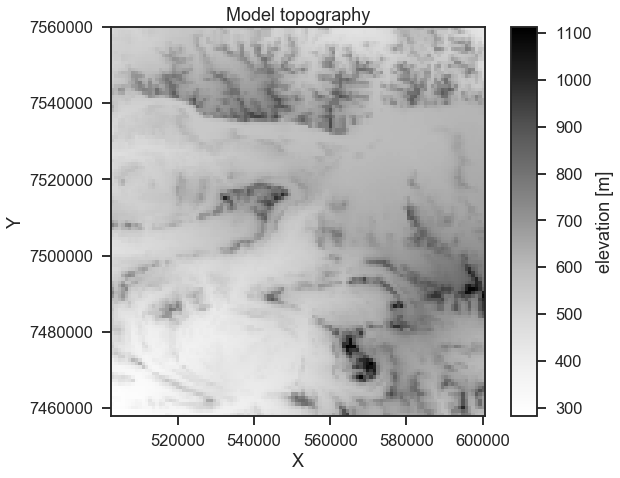

In [6]:
print(os.getcwd())
fp = '../test_data2/dtm/hams2_dtm_rp.tif'
geo_model.set_topography(source='gdal',filepath=fp)

## Load stratigraphic Series

f=open('../test_data2/tmp/hams2_groups.csv',"r")
contents =f.readlines()
f.close

# # This is not necessary all data objects are created and linked to geo_model on the init call!!!

# # faults = gp.Faults()
# # series = gp.Series(faults)
# # series.df

ngroups=(contents[0]).split(" ")
ngroups=int(ngroups[1])
groups=[]

for i in range (1,int(ngroups)+1):
     groups.append(contents[i].replace("\n",""))
#     geo_model.add_series(contents[i].replace("\n",""))

# geo_model.delete_series(['Default series', 'Basement'])



## Load surfaces and assign to series

In [7]:
geo_model.surfaces

surface          series  order_surfaces  isBasement    color vertices edges  id
0        A_FOp_bs  Default series               1       False  #015482      NaN   NaN   1
1       A_FOo_bbo  Default series               2       False  #9f0052      NaN   NaN   2
2      A_FOh_xs_f  Default series               3       False  #ffbe00      NaN   NaN   3
3        A_HAd_kd  Default series               4       False  #728f02      NaN   NaN   4
4    A_HAS_xsl_ci  Default series               5       False  #443988      NaN   NaN   5
5       A_HAm_cib  Default series               6       False  #ff3f20      NaN   NaN   6
6       A_FOu_bbo  Default series               7       False  #325916      NaN   NaN   7
7      A_FOj_xs_b  Default series               8       False  #5DA629      NaN   NaN   8
8      P__HAb_cib  Default series               9       False  #acc2d9      NaN   NaN   9
9       P__HAo_ci  Default series              10       False  #56ae57      NaN   NaN  10
10        P__TK_s  Default series              11       False  #b2996e      NaN   NaN  11
11      P__HAw_fr  Default series              12       False  #a8ff04      NaN   NaN  12
12  P__HAj_xci_od  Default series              13       False  #69d84f      NaN   NaN  13
13      P__WYm_sp  Default series              14       False  #894585      NaN   NaN  14
14     P__SKq_stq  Default series              15       False  #70b23f      NaN   NaN  15
15      P__WYa_st  Default series              16       False  #d4ffff      NaN   NaN  16
16     P__TKo_stq  Default series              17       False  #65ab7c      NaN   NaN  17
17    P__TKa_xs_k  Default series              18       False  #952e8f      NaN   NaN  18
18        A_FOr_b  Default series              19       False  #fcfc81      NaN   NaN  19
19      P__TKk_sf  Default series              20       False  #a5a391      NaN   NaN  20
20      P__SKb_bb  Default series              21       False  #388004      NaN   NaN  21
21       basement        Basement               1        True  #4c9085      NaN   NaN  22

In [8]:
geo_model.series

order_series BottomRelation
Default series             1        Erosion
Basement                   2        Erosion

In [9]:
print(os.getcwd())

for i in range(0,ngroups):
    f=open('../test_data2/tmp/'+groups[i]+'.csv',"r")
    contents =f.readlines()
    nformations=str(contents[0])
    nformations=nformations.split(" ")
    nformations=int(nformations[1].replace("\n",""))

    for j in range (1,int(nformations)+1):
        print(contents[j].replace("\n","").replace("-","_"))
        #geo_model.add_surfaces(contents[j].replace("\n",""))
        #d={groups[i]:contents[j].replace("\n","")}
        gp.map_series_to_surfaces(geo_model, {groups[i]:(contents[j].replace("\n","").replace("-","_"))},
                                  set_series=True, remove_unused_series=True)
        #geo_model.surfaces.map_series({groups[i]:(contents[j].replace("\n",""))}, )
    f.close

C:\Users\00073294\Dropbox\1_Jupyter_notebooks\map2loop\notebooks
P__WYa_st
P__WYm_sp
P__WYd_kd
P__SKq_stq
P__SKb_bb
P__TK_s
P__TKa_xs_k
P__TKo_stq
P__TKk_sf
P__HAo_ci
P__HAw_fr
P__HAj_xci_od
P__HAb_cib
A_HAS_xsl_ci
A_HAd_kd
A_HAm_cib
A_FOj_xs_b
A_FOu_bbo
A_FOp_bs
A_FOo_bbo
A_FOh_xs_f


ValueError: operands could not be broadcast together with shapes (6,) (5,) 

In [10]:
geo_model.surfaces

surface          series  order_surfaces  isBasement    color vertices edges  id
0        A_FOp_bs  Default series               1       False  #015482      NaN   NaN   1
1       A_FOo_bbo  Default series               2       False  #9f0052      NaN   NaN   2
2      A_FOh_xs_f  Default series               3       False  #ffbe00      NaN   NaN   3
3        A_HAd_kd  Default series               4       False  #728f02      NaN   NaN   4
4    A_HAS_xsl_ci  Default series               5       False  #443988      NaN   NaN   5
5       A_HAm_cib  Default series               6       False  #ff3f20      NaN   NaN   6
6       A_FOu_bbo  Default series               7       False  #325916      NaN   NaN   7
7      A_FOj_xs_b  Default series               8       False  #5DA629      NaN   NaN   8
8      P__HAb_cib  Default series               9       False  #acc2d9      NaN   NaN   9
9       P__HAo_ci  Default series              10       False  #56ae57      NaN   NaN  10
10        P__TK_s  Default series              11       False  #b2996e      NaN   NaN  11
11      P__HAw_fr  Default series              12       False  #a8ff04      NaN   NaN  12
12  P__HAj_xci_od  Default series              13       False  #69d84f      NaN   NaN  13
13      P__WYm_sp  Default series              14       False  #894585      NaN   NaN  14
14     P__SKq_stq  Default series              15       False  #70b23f      NaN   NaN  15
15      P__WYa_st  Default series              16       False  #d4ffff      NaN   NaN  16
16     P__TKo_stq  Default series              17       False  #65ab7c      NaN   NaN  17
17    P__TKa_xs_k  Default series              18       False  #952e8f      NaN   NaN  18
18        A_FOr_b  Default series              19       False  #fcfc81      NaN   NaN  19
19      P__TKk_sf  Default series              20       False  #a5a391      NaN   NaN  20
20      P__SKb_bb  Default series              21       False  #388004      NaN   NaN  21
21      P__WYd_kd  Default series              22       False  #4c9085      NaN   NaN  22
22        A_b_PRK  Default series              23       False  #5e9b8a      NaN   NaN  23
23        A_s_PMI  Default series              24       False  #efb435      NaN   NaN  24
24       basement        Basement               1        True  #d99b82      NaN   NaN  25

In [11]:
geo_model.surface_points

X             Y     Z       X_r       Y_r       Z_r        surface          series  id  order_series        smooth
0    561294.769513  7.455348e+06   640  0.543706  0.250100  0.499903       A_FOp_bs  Default series   1             1  1.000000e-08
1    550300.471121  7.458638e+06   476  0.494546  0.264813  0.499170       A_FOp_bs  Default series   1             1  1.000000e-08
2    548389.838343  7.459381e+06   454  0.486003  0.268133  0.499072       A_FOp_bs  Default series   1             1  1.000000e-08
3    541428.338990  7.459826e+06   447  0.454876  0.270123  0.499040       A_FOp_bs  Default series   1             1  1.000000e-08
18   603028.000000  7.481171e+06   658  0.730312  0.365565  0.499984       A_FOp_bs  Default series   1             1  1.000000e-08
19   595429.580811  7.480531e+06   645  0.696336  0.362703  0.499926       A_FOp_bs  Default series   1             1  1.000000e-08
20   587977.949448  7.478184e+06   692  0.663017  0.352210  0.500136       A_FOp_bs  Default series   1             1  1.000000e-08
526  530722.381819  7.487374e+06   455  0.407005  0.393299  0.499076       A_FOp_bs  Default series   1             1  1.000000e-08
527  520870.908223  7.485702e+06   706  0.362955  0.385827  0.500198       A_FOp_bs  Default series   1             1  1.000000e-08
528  517221.150655  7.475150e+06   407  0.346636  0.338645  0.498861       A_FOp_bs  Default series   1             1  1.000000e-08
529  544424.230629  7.465265e+06   422  0.468271  0.294442  0.498928       A_FOp_bs  Default series   1             1  1.000000e-08
530  545638.822057  7.465258e+06   433  0.473702  0.294413  0.498978       A_FOp_bs  Default series   1             1  1.000000e-08
531  552499.351699  7.472993e+06   476  0.504378  0.328997  0.499170       A_FOp_bs  Default series   1             1  1.000000e-08
532  543286.960689  7.484168e+06   533  0.463186  0.378966  0.499425       A_FOp_bs  Default series   1             1  1.000000e-08
533  531123.261726  7.487219e+06   455  0.408798  0.392608  0.499076       A_FOp_bs  Default series   1             1  1.000000e-08
4    603028.000000  7.480464e+06   654  0.730312  0.362404  0.499966      A_FOo_bbo  Default series   2             1  1.000000e-08
5    591227.920744  7.478256e+06   665  0.677549  0.352530  0.500015      A_FOo_bbo  Default series   2             1  1.000000e-08
6    593300.737300  7.476857e+06   665  0.686817  0.346277  0.500015      A_FOo_bbo  Default series   2             1  1.000000e-08
7    588107.730460  7.474715e+06   698  0.663597  0.336696  0.500163      A_FOo_bbo  Default series   2             1  1.000000e-08
405  555658.979180  7.455348e+06   514  0.518506  0.250100  0.499340      A_FOo_bbo  Default series   2             1  1.000000e-08
406  554580.133667  7.455771e+06   485  0.513682  0.251993  0.499210      A_FOo_bbo  Default series   2             1  1.000000e-08
407  554036.310131  7.455667e+06   485  0.511251  0.251528  0.499210      A_FOo_bbo  Default series   2             1  1.000000e-08
511  530219.249499  7.487047e+06   443  0.404755  0.391837  0.499022      A_FOo_bbo  Default series   2             1  1.000000e-08
512  522007.338526  7.483971e+06   532  0.368037  0.378087  0.499420      A_FOo_bbo  Default series   2             1  1.000000e-08
513  519254.761083  7.474853e+06   451  0.355729  0.337316  0.499058      A_FOo_bbo  Default series   2             1  1.000000e-08
514  532237.868400  7.466247e+06   446  0.413781  0.298835  0.499036      A_FOo_bbo  Default series   2             1  1.000000e-08
515  533845.659903  7.466003e+06   432  0.420971  0.297744  0.498973      A_FOo_bbo  Default series   2             1  1.000000e-08
516  547781.938872  7.466583e+06   438  0.483285  0.300335  0.499000      A_FOo_bbo  Default series   2             1  1.000000e-08
517  550472.311445  7.478080e+06   480  0.495315  0.351743  0.499188      A_FOo_bbo  Default series   2             1  1.000000e-08
518  532656.549452  7.486034e+06   430  0.415654  0.38730

In [12]:
geo_model.orientations

X             Y    Z       X_r       Y_r       Z_r           G_x       G_y       G_z  dip  azimuth  polarity        surface          series  id  order_series  smooth
17   513032.899812  7.482922e+06  442  0.327909  0.373396  0.499018 -1.731837e-01  0.192340  0.965926   15      318         1       A_FOp_bs  Default series   1             1    0.01
54   540784.731185  7.464544e+06  408  0.451998  0.291220  0.498866 -3.364090e-02 -0.641907  0.766044   40      183         1       A_FOp_bs  Default series   1             1    0.01
56   529500.738026  7.466242e+06  490  0.401543  0.298813  0.499233 -3.313588e-01 -0.780632  0.529919   58      203         1       A_FOp_bs  Default series   1             1    0.01
62   550491.005745  7.482013e+06  524  0.495398  0.369329  0.499385  3.596699e-01  0.622967  0.694658   46       30         1       A_FOp_bs  Default series   1             1    0.01
66   544268.348172  7.484998e+06  544  0.467574  0.382678  0.499474  2.493997e-01  0.724309  0.642788   50       19         1       A_FOp_bs  Default series   1             1    0.01
87   570632.369052  7.510870e+06  638  0.585458  0.498359  0.499894 -1.225691e-01 -0.319303  0.939693   20      201         1       A_FOp_bs  Default series   1             1    0.01
94   583959.610576  7.468823e+06  708  0.645050  0.310351  0.500207 -2.028928e-01  0.131760  0.970296   14      303         1       A_FOp_bs  Default series   1             1    0.01
0    530083.185332  7.485330e+06  415  0.404147  0.384159  0.498897  1.140039e-01  0.811180  0.573576   55        8         1     A_FOh_xs_f  Default series   3             1    0.01
1    532466.058612  7.483852e+06  419  0.414802  0.377550  0.498915  1.116189e-01  0.633022  0.766044   40       10         1     A_FOh_xs_f  Default series   3             1    0.01
16   522004.807902  7.478031e+06  389  0.368025  0.351524  0.498781 -4.993148e-01  0.026168  0.866025   30      273         1     A_FOh_xs_f  Default series   3             1    0.01
48   542701.745304  7.483245e+06  498  0.460570  0.374839  0.499268  1.387607e-01  0.556539  0.819152   35       14         1     A_FOh_xs_f  Default series   3             1    0.01
49   525682.682412  7.481645e+06  404  0.384471  0.367686  0.498848 -1.658147e-01  0.299138  0.939693   20      331         1     A_FOh_xs_f  Default series   3             1    0.01
50   524499.576028  7.473215e+06  383  0.379181  0.329992  0.498754 -4.008498e-01 -0.213136  0.891007   27      242         1     A_FOh_xs_f  Default series   3             1    0.01
51   528492.836790  7.469545e+06  439  0.397036  0.313582  0.499005 -2.094849e-01 -0.348641  0.913545   24      211         1     A_FOh_xs_f  Default series   3             1    0.01
53   543008.608580  7.470252e+06  456  0.461942  0.316741  0.499081  2.120121e-01 -0.148453  0.965926   15      125         1     A_FOh_xs_f  Default series   3             1    0.01
55   536199.958039  7.467392e+06  430  0.431497  0.303955  0.498964 -2.467767e-02 -0.706676  0.707107   45      182         1     A_FOh_xs_f  Default series   3             1    0.01
59   545084.605891  7.475582e+06  458  0.471224  0.340575  0.499089  5.565388e-01  0.138761  0.819152   35       76         1     A_FOh_xs_f  Default series   3             1    0.01
60   547604.250244  7.479559e+06  482  0.482491  0.358356  0.499197  3.189541e-01  0.277263  0.906308   25       49         1     A_FOh_xs_f  Default series   3             1    0.01
61   545698.080382  7.478003e+06  463  0.473967  0.351400  0.499112  2.399728e-01  0.096955  0.965926   15       68         1     A_FOh_xs_f  Default series   3             1    0.01
95   590500.004151  7.468483e+06  686  0.674294  0.308833  0.500109 -1.723538e-01 -0.021162  0.984808   10      263         1     A_FOh_xs_f  Default series   3             1    0.01
96   597012.981037  7.466577e+06  649  0.703416  0.300308  0.499944 -8.152288e-02 -0.153322  0.984808   10      208         1     A_FOh_xs_f  Default series   3             1

## Every surface need at least two surfaces points fix:

In gempy to do everything vectorial we always need at least a reference point and a--I call it--rest point (non-reference point). Usually I raise an error. With this fix you can add a point per surface on the same location as the reference point. I will add this in the next release (https://github.com/cgre-aachen/gempy/issues/211).

In [13]:
id_only_one_bool = geo_model.surface_points.df['id'].value_counts() == 1

In [14]:
id_only_one_bool = geo_model.surface_points.df['id'].value_counts() == 1
id_only_one = id_only_one_bool.index[id_only_one_bool]
single_vals = geo_model.surface_points.df[geo_model.surface_points.df['id'].isin(id_only_one)]
for idx, vals in single_vals.iterrows():
    geo_model.add_surface_points(vals['X'], vals['Y'], vals['Z'], vals['surface'])

## Set Interpolation Data

### Float 32

In [14]:
geo_model.additional_data.options.df['dtype'] = 'float32'
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...


/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/gof/cc.py:968: UserWarning: Your g++ compiler fails to compile OpenMP code. We know this happen with some version of the EPD mingw compiler and LLVM compiler on Mac OS X. We disable openmp everywhere in Theano. To remove this warning set the theano flags `openmp` to False.
  ret += x.c_compile_args()


Compilation Done!


/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=4.39805e-11): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=3.06245e-11): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.09024e-16): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=4.61544e-21): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=5.75266e-19): result may not be accurate.
  rval = scipy.linalg.solve(A

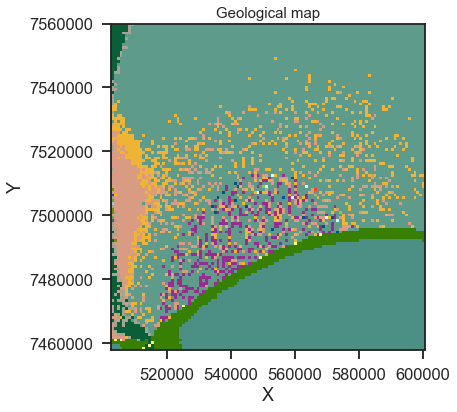

In [15]:
gp.compute_model(geo_model)
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)

### Float64

In [15]:
geo_model.additional_data.options.df['dtype'] = 'float64'

In [16]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...
Compilation Done!


## Provide summary data on model

In [17]:
geo_model.additional_data.structure_data

values
isLith                                                                    True
isFault                                                                  False
number faults                                                                0
number surfaces                                                             21
number series                                                                1
number surfaces per series                                                [21]
len surfaces surface_points  [15, 16, 19, 44, 60, 61, 25, 54, 105, 27, 14, ...
len series surface_points                                                [571]
len series orientations                                                  [115]

## Calculate Model

In [18]:
gp.compute_model(geo_model)

C:\Users\00073294\AppData\Local\Continuum\anaconda3\lib\site-packages\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e))



Lithology ids 
  [18.         18.         18.         ...  1.00003922  1.
  1.        ] 

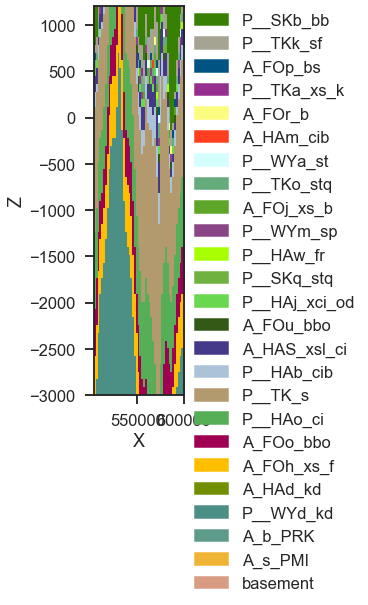

In [19]:
gp.plot.plot_section(geo_model, ve=20)

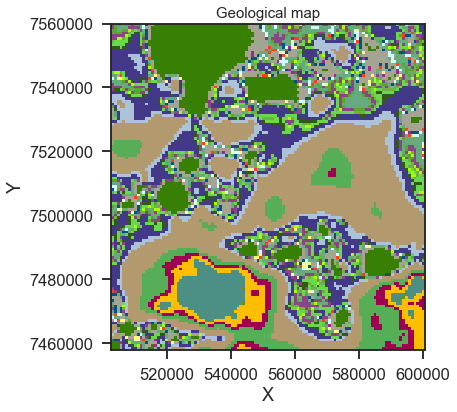

In [20]:
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)

## Extract surfaces to visualize in 3D renderers

In [21]:
ver , sim = gp.get_surfaces(geo_model)

## Visualise model

In [23]:
gp.plot.plot_3D(geo_model,  render_data=False)

AttributeError: 'GemPyvtkInteract' object has no attribute 'topo_visualization'

## Export model to vtk files

In [ ]:
from gempy import plot
gp.plot.export_to_vtk(geo_model, path='./test_data2/vtk/', name=mname+'.vtk', voxels=False, block=None, surfaces=True)